In [36]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [37]:
# Always reset the pseudo random number generator to the same number.
np.random.seed(42)

# Define the number of examples. 
M = 1000

# Generate observable function.
a0 = 1.4
a1 = 3.0
x = 10.0*np.random.rand(M, 1)
y = a0*(x**a1)

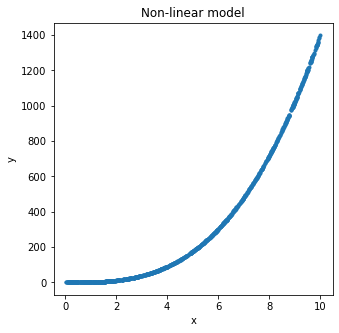

In [38]:
plt.figure(figsize=(5,5))
plt.title('Non-linear model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '.')
plt.show()

# Linearizando a função

In [39]:
x = np.log(x)
y = np.log(y)

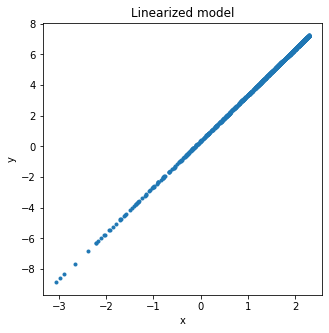

In [40]:
plt.figure(figsize=(5,5))
plt.title('Linearized model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '.')
plt.show()

In [41]:
# Generate values for parameters.
N = 200
a0 = np.linspace(-12.0, 14.0, N)
a1 = np.linspace(-12.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat))

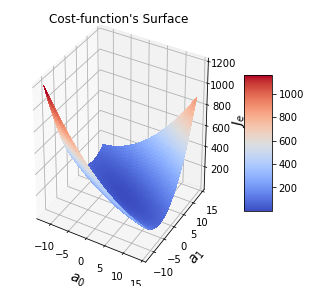

In [42]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
plt.savefig("error_surface_linearization.png", dpi=600)
#Show the plot.
plt.show()

In [43]:
# Concatenate both column vectors.
X = np.c_[np.ones((M,1)), x]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
yhat = X.dot(a_opt)
Joptimum = (1.0/M)*np.sum(np.power((y_noisy - yhat), 2))

In [44]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, precision=0.0001):
    """Batch gradient descent solution."""
    
    M = len(y)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > precision:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

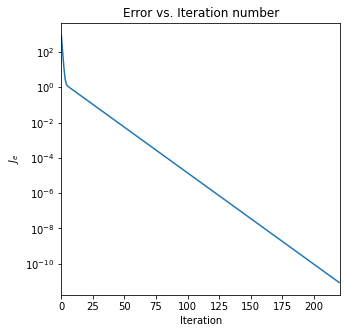

In [45]:
# learning rate.
alpha = 0.1

# Maximum number of iterations.
n_iterations = 10000

# Precision of the stop criteria.
precision = 1e-12

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations, precision)

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
# Save figure
plt.savefig("error-vs-iteration-number-linearization.png", dpi=600)
plt.show()

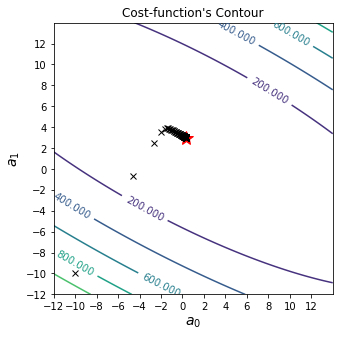

In [46]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.savefig("error_contour_linearization.png", dpi=600)
plt.show()

In [47]:
print('Pesos originais')
print('a0: ' + str(np.log(a0_)))
print('a1: ' + str(a1_))

print('\nEquação normal')
print('a0_opt:', a_opt[0][0])
print('a1_opt:', a_opt[1][0])

print('\nGradiente descendente')
print('a0_gd:', a[0][0])
print('a1_gd:', a[1][0])

Pesos originais
a0: 0.3364722366212129
a1: 3.0

Equação normal
a0_opt: 0.3364722366212085
a1_opt: 3.0000000000000036

Gradiente descendente
a0_gd: 0.33646770810690435
a1_gd: 3.0000025224242677
